In [23]:
import numpy as np
import matplotlib.pyplot as plt

from framework_pkg.framework import FrameWork
from framework_pkg.survival_probablity import MSW , ULDM, SunEarthDistance, ParseDate

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param = {'SinT12': 0.308, 'T13': 8.57, 'M12': 7.5e-5,
         'mdm' : 1e3, 'mu1': 0., 'mu2': 0., 'mu3': 0., 'alpha' : 0., 'epsx':1., 'epsy':0. }

Enu   = np.logspace(-1, np.log10(16), 300)

frame = FrameWork()

In [24]:
ProbB8M_uldm = np.loadtxt('Data/Matter_epsz_alpha0_mu2.txt')
ProbB8_uldm = np.loadtxt('Data/Nomatter_epsz_alpha0_mu2.txt')
ProbB8M_msw = np.loadtxt('Data/Matter_epsz_alpha0_msw.txt')
ProbB8_msw = np.loadtxt('Data/Nomatter_epsz_alpha0_msw.txt')

ECCENTRICITY = (1.521 - 1.471)/(1.521 + 1.471)
ASTRO_UNIT    =  1.496
RHO_DM2  = np.sqrt(2 * 0.4 * 7.65) #e-21 GeV^2
LIGHT_SPEED = 2.998 # 1e8 m/s

def SunEarthDistance(resolution=0.002):
    theta = np.arange(0,2*np.pi,resolution)
    cos   = np.cos(theta)
    l     = (1 - ECCENTRICITY**2) / (1 + ECCENTRICITY * cos)   
    return l,theta

_,th_radians = SunEarthDistance()

th_degrees = (180/np.pi) * th_radians

In [57]:
binning = np.arange(0,365,5)
data_list_msw = np.zeros((2,len(binning)-1))
data_list_Mmsw = np.zeros((2,len(binning)-1))
data_list_uldm = np.zeros((2,len(binning)-1))
data_list_Muldm = np.zeros((2,len(binning)-1))

for i in range (len(binning)-1):
    data_list_msw[0,i] = 0.5 * (binning[i] + binning[i+1])
    data_list_Mmsw[0,i] = 0.5 * (binning[i] + binning[i+1])
    data_list_uldm[0,i] = 0.5 * (binning[i] + binning[i+1])
    data_list_Muldm[0,i] = 0.5 * (binning[i] + binning[i+1])

    cond = (ProbB8M_msw[:,2] >= binning[i]) & (ProbB8M_msw[:,2] < binning[i+1])
    data_list_msw[1,i] = np.mean(ProbB8_msw[cond,1])
    data_list_Mmsw[1,i] = np.mean(ProbB8M_msw[cond,1])
    data_list_uldm[1,i] = np.mean(ProbB8_uldm[cond,1])
    data_list_Muldm[1,i] = np.mean(ProbB8M_uldm[cond,1])

<ErrorbarContainer object of 3 artists>

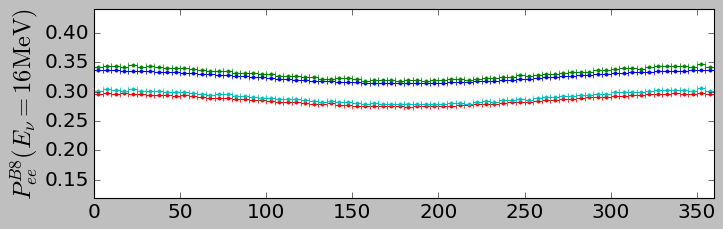

In [62]:
plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.12,0.44)
ax1.set_xlim(0,360)
#ax1.set_xscale('log')

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
#ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)

#ax1.plot(ProbB8_msw[:,2], ProbB8_msw[:,1], color='b',ls='--',lw=2, label= r'$\epsilon_y = 1$')
ax1.errorbar(data_list_msw[0],data_list_msw[1],yerr=None,xerr=2.5*np.ones(len(binning)-1),fmt='b.')

#ax1.plot(ProbB8_uldm[:,2], ProbB8_uldm[:,1],color='r',ls='--',lw=2, label= r'$\epsilon_x = 1$')
ax1.errorbar(data_list_uldm[0],data_list_uldm[1],yerr=None,xerr=2.5*np.ones(len(binning)-1),fmt='r.')

#ax1.plot(ProbB8M_msw[:,2], ProbB8M_msw[:,1], color='g',ls='--',lw=2, label= r'$\epsilon_y = 1$')
ax1.errorbar(data_list_Mmsw[0],data_list_Mmsw[1],yerr=None,xerr=2.5*np.ones(len(binning)-1),fmt='g.')

#ax1.plot(ProbB8M_uldm[:,2], ProbB8M_uldm[:,1],color='c',ls='-',lw=2, label= r'$\epsilon_x = 1$')
ax1.errorbar(data_list_Muldm[0],data_list_Muldm[1],yerr=None,xerr=2.5*np.ones(len(binning)-1),fmt='c.')




#ax1.plot(th_degrees, peanuts_B8_epsz_mu2_el[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_z = 1$')
#ax1.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_2= 0.3 \times 10^{-6} \ [\rm GeV]^{-1}$',y=1.05, pad=2, x=.27,fontsize=18)

# plt.legend(ncol=4,fontsize=14)

# ax0 = fig.add_subplot(312)
# ax0.set_ylim(0.12,0.44)
# ax0.set_xlim(0,360)

# ax0.tick_params(axis='both', which='minor', length=4)
# ax0.tick_params(axis='both', which='major', length=5)

# ax0.set_xlabel(r'$\theta $',fontsize=22)
# ax0.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 6 \rm MeV)$',fontsize=22)
# ax0.get_xaxis().get_major_formatter().set_useOffset(False)


# ax0.plot(th_degrees,peanuts_B8_epsy_mu1_el[:,1],color='b',ls='-',lw=2, label= r'$\epsilon_x = 1$')
# ax0.plot(th_degrees,peanuts_B8_epsx_mu1_el[:,1],color='r',ls='-',lw=2, label= r'$\epsilon_x = 1$')
# ax0.plot(th_degrees,peanuts_B8_epsz_mu1_el[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_x = 1$')

# ax0.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_1=0.3 \times 10^{-6} \ [\rm GeV]^{-1}$',y=1.05, pad=2, x=.27,fontsize=18)

#plt.savefig('Pee_E16(6)_alpha0_epsxyz_mu1_mu2_angle.pdf',bbox_inches='tight')

<ErrorbarContainer object of 3 artists>

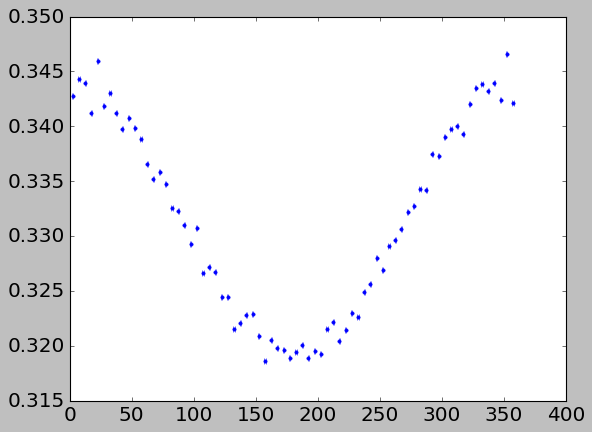

In [43]:
plt.errorbar(data_list[0],data_list[1],yerr=None,xerr=0.5*np.ones(len(binning)-1),fmt='.')